#Resize the image, moon, to 512x512 and convert to grayscale. Design the following low pass filters:
(a) Ideal lowpass filter
(b) Gaussian lowpass filter
(c) Butterworth lowpass filter
Demonstrate your filters by showing the effect of different cut-off frequencies (say 10, 20, 40, 60, 100) for the 3 types filters and filter orders for Butterworth filter (say 1, 4, 8). Display and comment on the results of applying the filters to the image. (10 points)

In [83]:
import IP
% pylab inline

Populating the interactive namespace from numpy and matplotlib


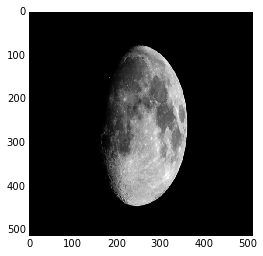

In [84]:
I = IP.imread('/Users/Bato/moon.jpg')
I = IP.rgb2gray(I)
I = IP.imresize(I,(512,512))
IP.imshow(I,cmap='gray')

In the code below, I am going to perform a series of low pass filter on the image I have shown above. As we konw, the low frequency in the image represents the rough information of the image, and the high frequency of the iamge stands for the details and noise of the image. Therefore, we can expect that after the the low-pass filter performance, the image will become blurrer.

In [27]:
# Design Ideal low-pass filter
def ideal_low(a,image):
    U,V = IP.dtfuv(512,512)
    D = np.sqrt(U**2+V**2)
    Low_pass_filter_a = D<=a
    # Low_pass_filter_a = IP.fftshift(Low_pass_filter_a)
    I_ideal_low_a = IP.fftfilt(image,Low_pass_filter_a)
    
    return I_ideal_low_a

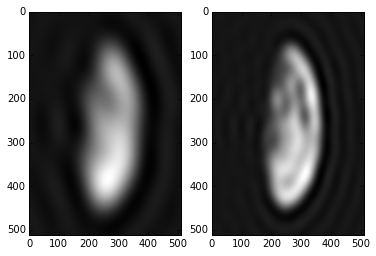

In [28]:
# Change the cutoff frequency to 10,20
I_ideal_low_10 = ideal_low(10,I)
I_ideal_low_20 = ideal_low(20,I)
subplot(121);imshow(I_ideal_low_10,aspect='auto',cmap='gray')
subplot(122);imshow(I_ideal_low_20,aspect='auto',cmap='gray')

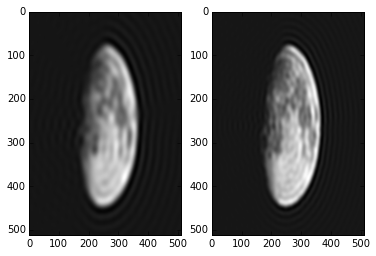

In [39]:
# Change the cutoff frequency to 40,60
I_ideal_low_40 = ideal_low(40,I)
I_ideal_low_60 = ideal_low(60,I)
subplot(121);imshow(I_ideal_low_40,aspect='auto',cmap='gray')
subplot(122);imshow(I_ideal_low_60,aspect='auto',cmap='gray')

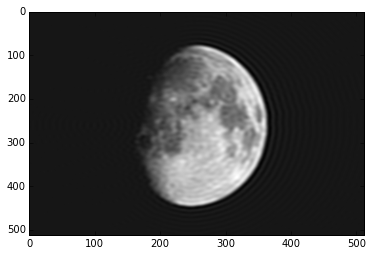

In [40]:
I_ideal_low_100 = ideal_low(100,I)
imshow(I_ideal_low_100,aspect='auto',cmap='gray')

As we see from the images shown above, when the cut-off frequency is low, the image is really blurrer. That's not hard to understand because a large part of the frequency are lost. But as we increase, although the image become clearer, the ringing effect becomes obvious. That's because the ideal low-passs filter in fourier domain correspond to sinc function in the spatial domain. And there is a lot of ringing in the sinc function. Therefore if we construct the image based on sinc function in the spatial domain, the ringing effect will appear. 

In [29]:
# Design Gaussian low-pass filter
def Gaussian_low_pass(Image,cut_off_fre):
    U,V = IP.dtfuv(512,512)
    D = np.sqrt(U**2+V**2)
    GLPF = exp(-D**2/(2*(cut_off_fre**2)))
    I_GLPF = IP.fftfilt(Image,GLPF)
    return I_GLPF

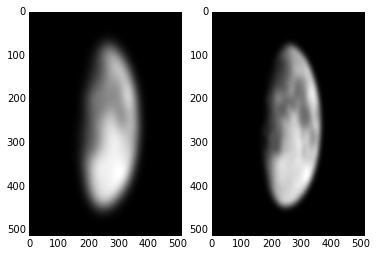

In [30]:
# Change the cutoff frequency to 10,20
I_Gaussian_low_10 = Gaussian_low_pass(I,10)
I_Gaussian_low_20 = Gaussian_low_pass(I,20)
subplot(121);imshow(I_Gaussian_low_10,aspect='auto',cmap='gray')
subplot(122);imshow(I_Gaussian_low_20,aspect='auto',cmap='gray')

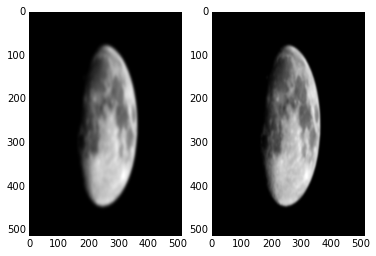

In [31]:
# Change the cutoff frequency to 40,60
I_Gaussian_low_40 = Gaussian_low_pass(I,40)
I_Gaussian_low_60 = Gaussian_low_pass(I,60)
subplot(121);imshow(I_Gaussian_low_40,aspect='auto',cmap='gray')
subplot(122);imshow(I_Gaussian_low_60,aspect='auto',cmap='gray')

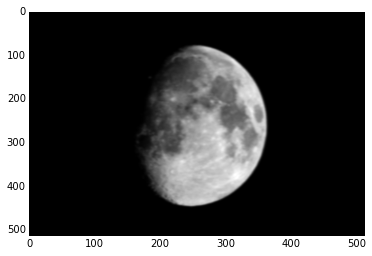

In [32]:
# Change the cutoff frequency to 100
I_Gaussian_low_100 = Gaussian_low_pass(I,100)
imshow(I_Gaussian_low_100,aspect='auto',cmap='gray')

As we expect, Gaussian filter is a smooth filter, and there is no ringing effect in the image. And if we increase the cut-off frequency, the image will become much cleaner.

In [33]:
# Design the butterworth filter
def Butterworth_low_pass(Image,cut_off,order):
    U,V = IP.dtfuv(512,512)
    D = np.sqrt(U**2+V**2)
    Butterworth_filter = 1/(1+(D/cut_off)**(2*order))
    I_Butterworth = IP.fftfilt(Image,Butterworth_filter)
    return I_Butterworth

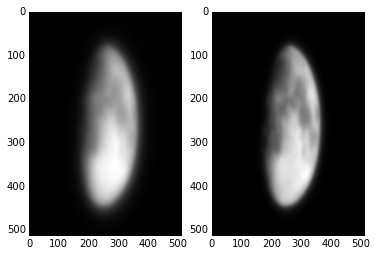

In [34]:
# Change the cutoff frequency to 10,20
I_Butterworth_low_10 = Butterworth_low_pass(I,10,1)
I_Butterworth_low_20 = Butterworth_low_pass(I,20,1)
subplot(121);imshow(I_Butterworth_low_10,aspect='auto',cmap='gray')
subplot(122);imshow(I_Butterworth_low_20,aspect='auto',cmap='gray')

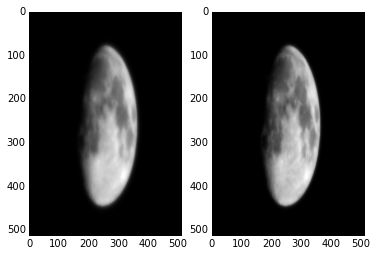

In [35]:
# Change the cutoff frequency to 40,60
I_Butterworth_low_40 = Butterworth_low_pass(I,40,1)
I_Butterworth_low_60 = Butterworth_low_pass(I,60,1)
subplot(121);imshow(I_Butterworth_low_40,aspect='auto',cmap='gray')
subplot(122);imshow(I_Butterworth_low_60,aspect='auto',cmap='gray')

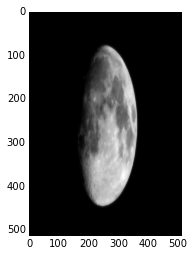

In [36]:
# Change the cutoff frequency to 100
I_Butterworth_low_100 = Butterworth_low_pass(I,100,1)
subplot(122);imshow(I_Butterworth_low_100,aspect='auto',cmap='gray')

Same to the Gaussian filter, the higher the cut-off frequency, the more detail are included, therefore the cleaner the image. And there is no ringing effect of in the butterworth filter with the order 1. 

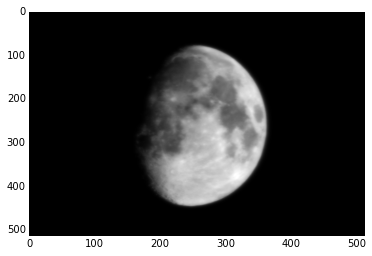

In [66]:
# Change the order of the butterworth filter,fix the cut_off frequency at 80
I_Butterworth_low_order1 = Butterworth_low_pass(I,80,1)
imshow(I_Butterworth_low_order1,aspect='auto',cmap='gray')

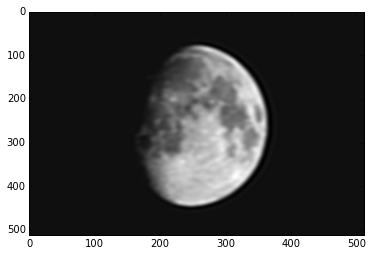

In [64]:
# When the order equals one
I_Butterworth_low_order4 = Butterworth_low_pass(I,80,4)
imshow(I_Butterworth_low_order4,aspect='auto',cmap='gray')

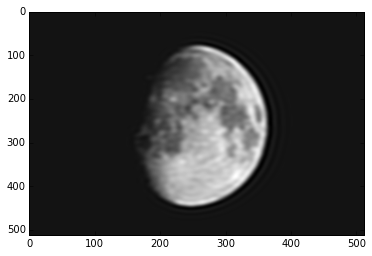

In [73]:
I_Butterworth_low_order8 = Butterworth_low_pass(I,80,8)
imshow(I_Butterworth_low_order8,aspect='auto',cmap='gray')

As we see, when we increase the order from 1 to 8. The image become blurrer(not obvious),but one remarkable change is that the ringing effect shows up. Actually with high order, the butterworth filter will act more like a ideal filter. With low order, it acts like Gaussian filter. That why in the textbook a butterworth filter is also called transition filter. 

#Design a series of highpass filters in Fourier domain (Ideal, Gaussian, Butterworth)for the same cutoff frequencies and filter orders chosen in the previous question. Apply these filters on moon.jpg. Show the effect of filter order and cut-off frequencies on the same image that was used in question 1

In [39]:
# Ideal High pass frequency
def ideal_high(a,image):
    U,V = IP.dtfuv(512,512)
    D = np.sqrt(U**2+V**2)
    Low_pass_filter_a = D<=a
    High_pass_filter_a = 1 - Low_pass_filter_a
    # Low_pass_filter_a = IP.fftshift(Low_pass_filter_a)
    I_ideal_high_a = IP.fftfilt(image,High_pass_filter_a)
    
    return I_ideal_high_a

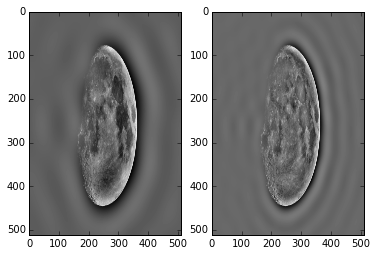

In [40]:
# Change the cutoff frequency to 10,20
I_ideal_high_10 = ideal_high(10,I)
I_ideal_high_20 = ideal_high(20,I)
subplot(121);imshow(I_ideal_high_10,aspect='auto',cmap='gray')
subplot(122);imshow(I_ideal_high_20,aspect='auto',cmap='gray')

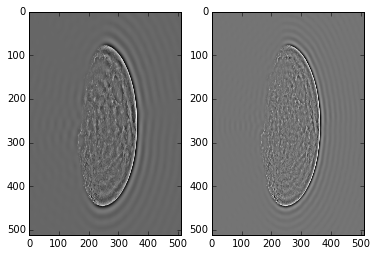

In [41]:
# Change the cutoff frequency to 40,60
I_ideal_high_40 = ideal_high(40,I)
I_ideal_high_60 = ideal_high(60,I)
subplot(121);imshow(I_ideal_high_40,aspect='auto',cmap='gray')
subplot(122);imshow(I_ideal_high_60,aspect='auto',cmap='gray')

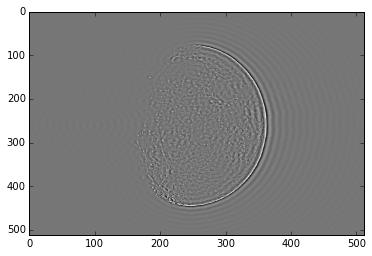

In [42]:
# Change the cutoff frequency to 100
I_ideal_high_100 = ideal_high(100,I)
imshow(I_ideal_high_100,aspect='auto',cmap='gray')

As we see from the image above, after applying the high-pass filter, the gray scale of an image has change. And the content of an image can hardly be recognized. And ringing effect still exists.As we increase the cut-off frequency, the image becomes harder and harder to be recognized, but the edge of the object in the image becomes clearer. 

In [86]:
# Design Gaussian high-pass filter
def Gaussian_high_pass(Image,cut_off_fre):
    U,V = IP.dtfuv(512,512)
    D = np.sqrt(U**2+V**2)
    GLPF = exp(-D**2/(2*(cut_off_fre**2)))
    GHPF = 1 - GLPF
    I_GHPF = IP.fftfilt(Image,GHPF)
    return I_GHPF

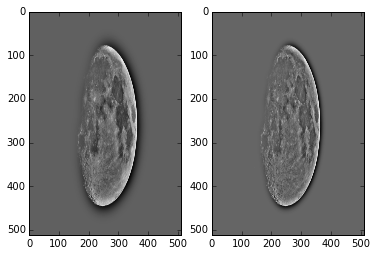

In [87]:
# Change the cutoff frequency to 10,20
I_Gaussian_high_10 = Gaussian_high_pass(I,10)
I_Gaussian_high_20 = Gaussian_high_pass(I,20)
subplot(121);imshow(I_Gaussian_high_10,aspect='auto',cmap='gray')
subplot(122);imshow(I_Gaussian_high_20,aspect='auto',cmap='gray')

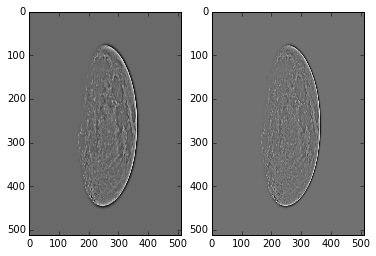

In [88]:
# Change the cutoff frequency to 40,60
I_Gaussian_high_40 = Gaussian_high_pass(I,40)
I_Gaussian_high_60 = Gaussian_high_pass(I,60)
subplot(121);imshow(I_Gaussian_high_40,aspect='auto',cmap='gray')
subplot(122);imshow(I_Gaussian_high_60,aspect='auto',cmap='gray')

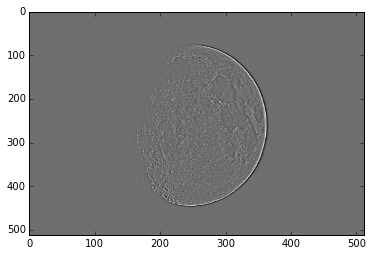

In [90]:
# Change the cutoff frequency to 100
I_Gaussian_high_100 = Gaussian_high_pass(I,100)
imshow(I_Gaussian_high_100,aspect='auto',cmap='gray')

And as we expected, there is no ringing in Gaussian filter. And as the cut-off frequency increase, the edge are easier to recognize.

In [93]:
# Design the butterworth hagh-pass filter
def Butterworth_high_pass(Image,cut_off,order):
    U,V = IP.dtfuv(512,512)
    D = np.sqrt(U**2+V**2)
    Butterworth_filter = 1/(1+(D/cut_off)**(2*order))
    BHPF = 1 - Butterworth_filter
    I_Butterworth_high = IP.fftfilt(Image,BHPF)
    return I_Butterworth_high

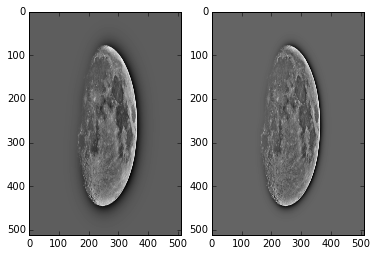

In [94]:
# Change the cutoff frequency to 10,20
I_Butterworth_high_10 = Butterworth_high_pass(I,10,1)
I_Butterworth_high_20 = Butterworth_high_pass(I,20,1)
subplot(121);imshow(I_Butterworth_high_10,aspect='auto',cmap='gray')
subplot(122);imshow(I_Butterworth_high_20,aspect='auto',cmap='gray')

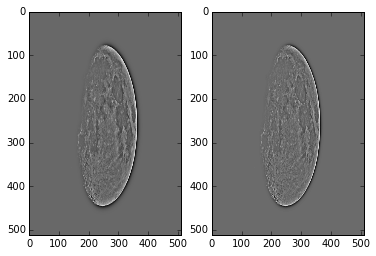

In [96]:
# Change the cutoff frequency to 40,60
I_Butterworth_high_40 = Butterworth_high_pass(I,40,1)
I_Butterworth_high_60 = Butterworth_high_pass(I,60,1)
subplot(121);imshow(I_Butterworth_high_40,aspect='auto',cmap='gray')
subplot(122);imshow(I_Butterworth_high_60,aspect='auto',cmap='gray')

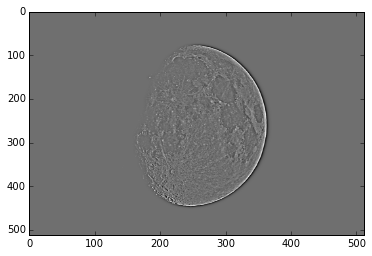

In [98]:
# Change the cutoff frequency to 100
I_Butterworth_high_100 = Butterworth_high_pass(I,100,1)
imshow(I_Butterworth_high_100,aspect='auto',cmap='gray')

When the cut-off frequency is low, if we look at the image hard we can still find some ringing effect. But as we increase cut-off frequency, the image shown is very close to what we get from the Gaussian Filter. 

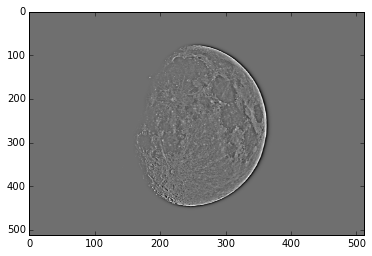

In [99]:
# Change the order of the butterworth high-pass filter,fix the cut_off frequency at 80
I_Butterworth_high_order1 = Butterworth_high_pass(I,80,1)
imshow(I_Butterworth_high_order1,aspect='auto',cmap='gray')

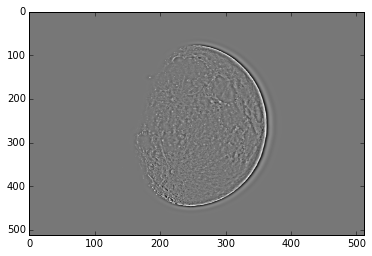

In [101]:
# Change the order of the butterworth high-pass filter,fix the cut_off frequency at 80
I_Butterworth_high_order4 = Butterworth_high_pass(I,80,4)
imshow(I_Butterworth_high_order4,aspect='auto',cmap='gray')

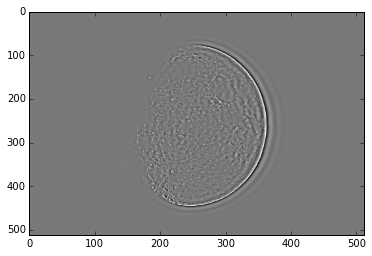

In [102]:
# Change the order of the butterworth high-pass filter,fix the cut_off frequency at 80
I_Butterworth_high_order8= Butterworth_high_pass(I,80,8)
imshow(I_Butterworth_high_order8,aspect='auto',cmap='gray')

If we increase the order of butterworth filter, the ringing effect appears again,and the edge of the object is somewhat distorted. And the image shown likes the one we get from ideal high pass filter. 

# choose the results filtered by a Gaussian high pass filter and low pass filter with cut-off frequency 20,40

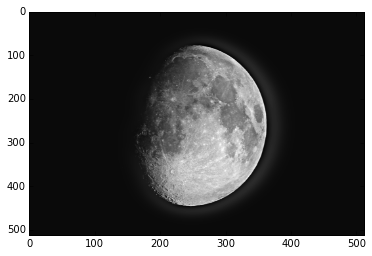

In [103]:
Gaussian_add_20 = I_Gaussian_low_20 + I_Gaussian_high_20 
imshow(Gaussian_add_20,aspect='auto',cmap='gray')

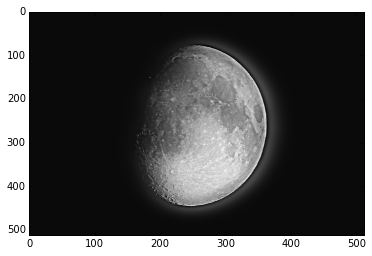

In [106]:
Gaussian_add_40 = I_Gaussian_low_40 + I_Gaussian_high_40 
imshow(Gaussian_add_40,aspect='auto',cmap='gray')

Before I conduct the experiment, I think that if we add the two results together, we will get the original image. But actually the result shows halo effect would appear around the edge of the object.

#4. Cascading filters. 

In [48]:
# Design Gaussian low-pass filter Ha
def Ha(Image):
    U,V = IP.dtfuv(512,512)
    D = np.sqrt(U**2+V**2)
    GLPF = exp(-D**2/(2*(70**2)))
    I_GLPF = IP.fftfilt(Image,GLPF)
    return I_GLPF

In [46]:
# Design Gaussian high-pass filter Hb
def Hb(Image):
    U,V = IP.dtfuv(512,512)
    D = np.sqrt(U**2+V**2)
    GLPF = exp(-D**2/(2*(20**2)))
    GHPF = 1 - GLPF
    I_GHPF = IP.fftfilt(Image,GHPF)
    return I_GHPF

Perform filtering in Figure 1 (a)

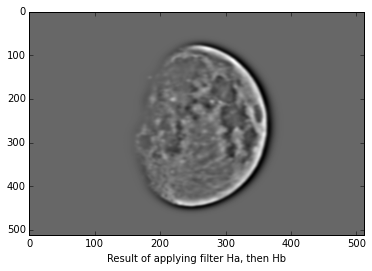

In [49]:
I_Cascade = Ha(I)
I_Cascade = Hb(I_Cascade)
imshow(I_Cascade,aspect='auto',cmap='gray');xlabel('Result of applying filter Ha, then Hb')

In [44]:
# Design filter Hb multiply Ha
def H_a_b(Image):
    U,V = IP.dtfuv(512,512)
    D = np.sqrt(U**2+V**2)
    GLPF_70 = exp(-D**2/(2*(70**2)))
    GLPF_20 = exp(-D**2/(2*(20**2)))
    GHPF = 1 - GLPF_20
    I_GH_LPF = IP.fftfilt(Image,GHPF*GLPF_70)
    return I_GH_LPF

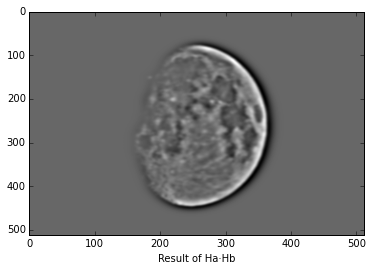

In [45]:
I_Cascade_2 = H_a_b(I)
imshow(I_Cascade_2,aspect='auto',cmap='gray');xlabel('Result of Ha·Hb')

The outputs of these two kinds of filtering are very very similar,it seems that there is no difference in the output.

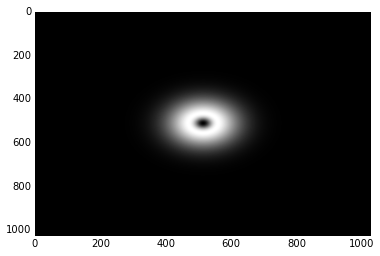

In [126]:
U,V = IP.dtfuv(512,512)
D = np.sqrt(U**2+V**2)
GLPF_70 = exp(-D**2/(2*(70**2)))
GLPF_20 = exp(-D**2/(2*(20**2)))
GHPF = 1 - GLPF_20
imshow(fftshift(GHPF*GLPF_70),aspect='auto',cmap='gray')

This filter is called band-pass filter

I am going to prove the relationship in the figure in the time domain.As we know, multiplication in fourier domain denotes convolution in time-domain. 

In [4]:
Prove = IP.imread('/Users/Bato/Documents/Study/Courses_in_UR/DIP/HW/DIP-HW4/latex-image-1.jpeg')

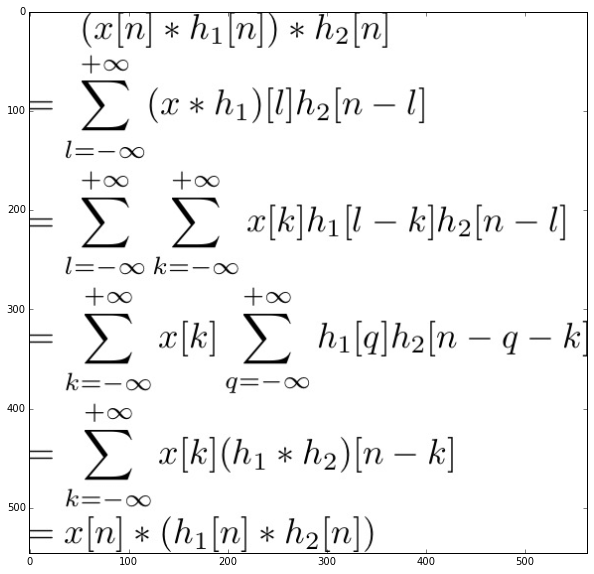

In [10]:
fig,ax1 = subplots(nrows=1, figsize=(10,10)) 
ax1.imshow(Prove,aspect=1)

Therefore, in fourier domain, it doesn't matter whether we input the image separably into system Ha then Hb, or input the image into a system with system function Ha×Hb,the effect will be the same. This property of convolution is called associativity.

# 5)Design another Gaussian Filter

In [170]:
hg = zeros([11,11])
for x in range(-5,5,1):
    for y in range(-5,5,1):
        hg[x+5,y+5] = exp(-np.sqrt(x**2+y**2)**2/(2*(2**2)))

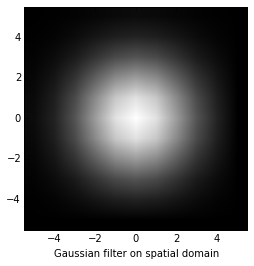

In [171]:
imshow(hg,extent=(-5.5,5.5,-5.5,5.5),cmap='gray');xlabel('Gaussian filter on spatial domain')

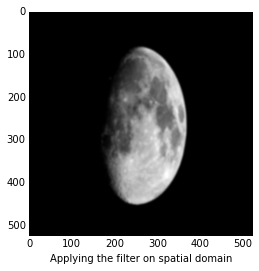

In [172]:
I_convolve = IP.filter2D(I,hg)
imshow(I_convolve,cmap='gray');xlabel('Applying the filter on spatial domain')

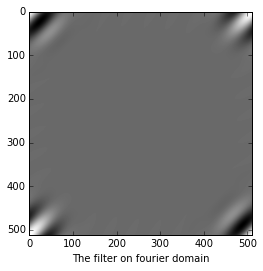

In [182]:
hg = hg.astype('float')
F_Hg = fft2(hg,(512,512)) # hg is the Gaussian filter in spatial domain, now perform fourier transform on it
imshow(F_Hg.real,cmap='gray');xlabel('The filter on fourier domain')

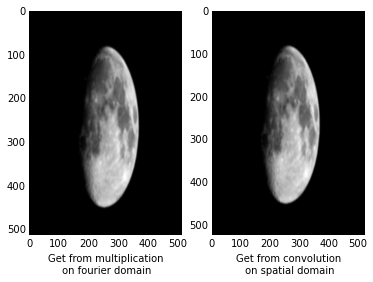

In [174]:
I_fre = IP.fft2(I)*F_Hg # Convolution on spatial domain equals multiplication on fourier domain
I_fre = IP.ifft2(I_fre) # Take the inverse fourier transform
subplot(121);imshow(I_fre.real,aspect='auto',cmap='gray');xlabel('Get from multiplication \n on fourier domain')
subplot(122);imshow(I_convolve,aspect='auto',cmap='gray');xlabel('Get from convolution \n on spatial domain')

It's very difficult to tell the difference in eye, so I decided to use MSE to see the difference between the image. As these two images are of differenct size,one 512*512, and the other one 522*522. I select the 500*500 pixels in the image, because the pixels on the edge are clearly the same. 

In [175]:
i2 = 0
difference = zeros((500,500))
for i1 in range(0,500,1):
    difference[i1,i2]=I_fre.real[i1,i2] - I_convolve[i1,i2]
    i2 = i2+1

In [176]:
MSE = sum(difference**2/(500*500))
MSE 

1.3165692685032613e-26

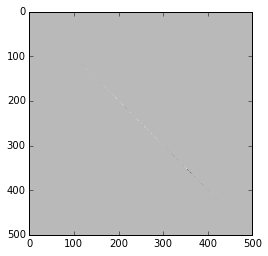

In [177]:
imshow(difference,cmap='gray')

The MSE is smaller than 0.05,which denotes that it is a good result